In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from scipy import stats

In [2]:
data = pd.read_excel('nl_sp_customers_q1.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103271 entries, 0 to 103270
Data columns (total 16 columns):
CUSTOMER_ID      103271 non-null int64
TIER             103271 non-null object
ORDERS           103271 non-null int64
SALES            103271 non-null float64
NET_SALES        103271 non-null float64
BASKET_AVG       103271 non-null float64
CM1              103271 non-null float64
CM1_AVG          103271 non-null float64
CM1%             103268 non-null float64
%_NEG_CM1_ORD    103271 non-null float64
LOSS_IN_CM1      103271 non-null float64
CM2              103271 non-null float64
CM2_AVG          103271 non-null float64
CM2%             103268 non-null float64
%_NEG_CM2_ORD    103271 non-null float64
LOSS_IN_CM2      103271 non-null float64
dtypes: float64(13), int64(2), object(1)
memory usage: 12.6+ MB


In [4]:
data.sample(10)

,CUSTOMER_ID,TIER,ORDERS,SALES,NET_SALES,BASKET_AVG,CM1,CM1_AVG,CM1%,%_NEG_CM1_ORD,LOSS_IN_CM1,CM2,CM2_AVG,CM2%,%_NEG_CM2_ORD,LOSS_IN_CM2
61477,6672721,[151],1,28.01,23.15,28.01,6.68,6.68,28.85,0.0,0.0,1.09,1.09,4.69,0.0,0.00
38093,2593994,[52],2,164.87,136.26,82.44,31.27,15.63,22.95,0.0,0.0,16.41,8.20,12.04,0.0,0.00
94371,19727443,[56],1,53.18,43.95,53.18,18.28,18.28,41.59,0.0,0.0,13.23,13.23,30.10,0.0,0.00
28023,4514816,[52],1,52.03,43.00,52.03,23.25,23.25,54.07,0.0,0.0,17.15,17.15,39.89,0.0,0.00
56246,2799915,[52],3,212.39,175.53,70.80,42.79,14.26,24.38,0.0,0.0,27.78,9.26,15.83,0.0,0.00
100050,6520524,[51],1,167.76,138.64,167.76,55.20,55.20,39.82,0.0,0.0,44.40,44.40,32.03,0.0,0.00
88104,19314439,[55],1,118.30,97.77,118.30,19.00,19.00,19.43,0.0,0.0,12.28,12.28,12.56,0.0,0.00
74546,17792327,[151],1,67.43,55.73,67.43,13.18,13.18,23.65,0.0,0.0,-0.74,-0.74,-1.33,100.0,-0.74
99043,8568244,[55],1,166.82,137.87,166.82,25.11,25.11,18.21,0.0,0.0,12.95,12.95,9.39,0.0,0.00
8726,3479780,[52],1,70.79,58.50,70.79,10.30,10.30,17.61,0.0,0.0,4.74,4.74,8.11,0.0,0.00


In [5]:
data[['ORDERS', 'BASKET_AVG', 'CM2', 'CM2%']].fillna(0).describe().round(2)

,ORDERS,BASKET_AVG,CM2,CM2%
count,103271.00,103271.00,103271.00,103271.00
mean,1.96,70.89,12.48,9.86
std,1.43,40.44,18.78,10.35
min,1.00,0.00,-159.94,-560.34
25%,1.00,45.49,2.45,3.85
50%,2.00,60.70,7.76,9.77
75%,2.00,85.80,16.80,15.69
max,50.00,1626.05,1024.59,73.54


In [6]:
data['TIER'].unique()

array(['[52]', '[51]', '[56]', '[53]', '[53 54]', '[54]', '[151]', '[55]',
       '[51 52]', '[56 51]', '[52 51]', '[152]', '[56 52]', '[152  52]',
       '[ 51 151]', '[151  51]', '[151 152]', '[54 53]', '[151  52]',
       '[ 54 151]', '[152  51]', '[51 54]', '[51 53]', '[ 54 152]',
       '[ 52 151]', '[55 51]', '[55 52]', '[56 54]', '[56 53]',
       '[ 52 152]', '[ 55 151]', '[57]', '[152 151]', '[52 53]',
       '[ 53 152]', '[202]', '[ 51 152]', '[ 53 151]', '[51 56]',
       '[53 52]', '[ 56 151]', '[52 54]', '[154]'], dtype=object)

In [7]:
selected_tiers = ['[51]',
 '[52]',
 '[53]',
 '[54]',
 '[55]',                 
 '[56]',
 '[151]',
 '[152]']
selected_tiers

['[51]', '[52]', '[53]', '[54]', '[55]', '[56]', '[151]', '[152]']

In [8]:
data = data[data['TIER'].isin(selected_tiers)]

In [9]:
data['CUSTOMER_ID'].nunique()

101570

In [10]:
tiers = [51, 52, 53, 54, 55, 56, 151, 152]

In [11]:
def get_number_from_string(i):
    changes = i.replace('[', '').replace(']', '')
    return int(changes)

In [12]:
data['TIER'] = data['TIER'].map(get_number_from_string)

In [13]:
data.head()

,CUSTOMER_ID,TIER,ORDERS,SALES,NET_SALES,BASKET_AVG,CM1,CM1_AVG,CM1%,%_NEG_CM1_ORD,LOSS_IN_CM1,CM2,CM2_AVG,CM2%,%_NEG_CM2_ORD,LOSS_IN_CM2
0,5522699,52,10,515.10,425.70,51.51,134.05,13.41,31.49,0.0,0.0,66.74,6.67,15.68,10.00,-1.41
1,12303445,51,21,1361.08,1126.79,64.81,369.36,17.59,32.78,0.0,0.0,186.77,8.89,16.58,4.76,-6.16
2,12120478,51,8,1016.67,843.83,127.08,172.40,21.55,20.43,0.0,0.0,77.91,9.74,9.23,12.50,-3.89
3,6762200,52,2,63.50,52.48,31.75,12.72,6.36,24.24,0.0,0.0,2.95,1.47,5.62,0.00,0.00
4,17339750,56,2,179.75,148.55,89.88,31.45,15.73,21.17,0.0,0.0,9.86,4.93,6.64,0.00,0.00


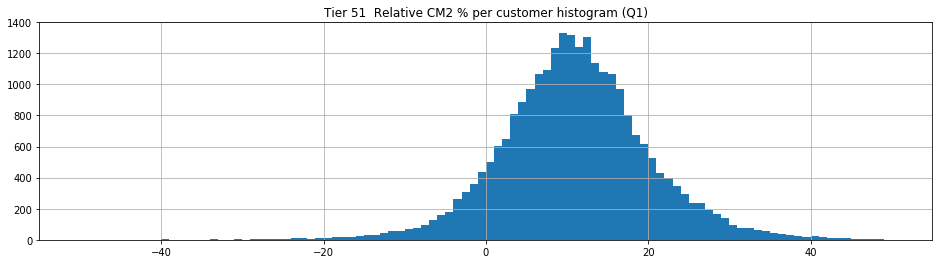

,CM2%
count,25413.000000
mean,10.963003
std,9.690659
min,-393.490000
25%,5.490000
50%,10.840000
75%,16.270000
max,62.250000


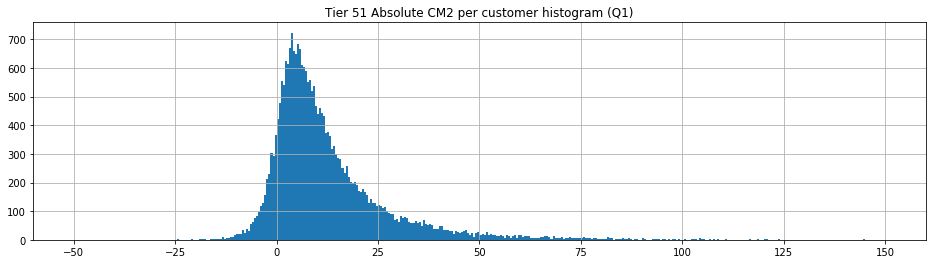

,CM2
count,25413.000000
mean,12.901827
std,17.443010
min,-53.050000
25%,3.490000
50%,8.540000
75%,16.980000
max,832.920000


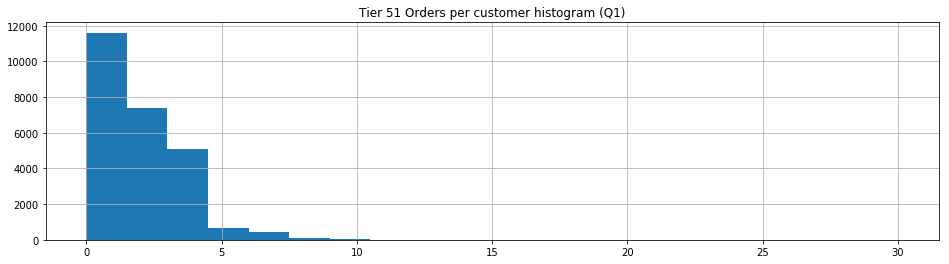

,ORDERS
count,25413.000000
mean,2.016252
std,1.375397
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,24.000000


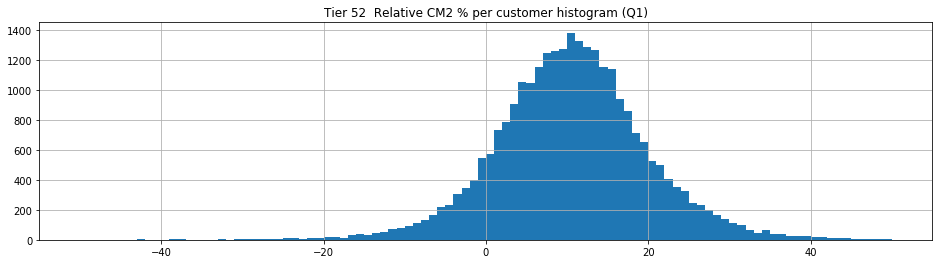

,CM2%
count,27496.000000
mean,10.505069
std,9.727893
min,-332.480000
25%,4.787500
50%,10.500000
75%,16.030000
max,60.970000


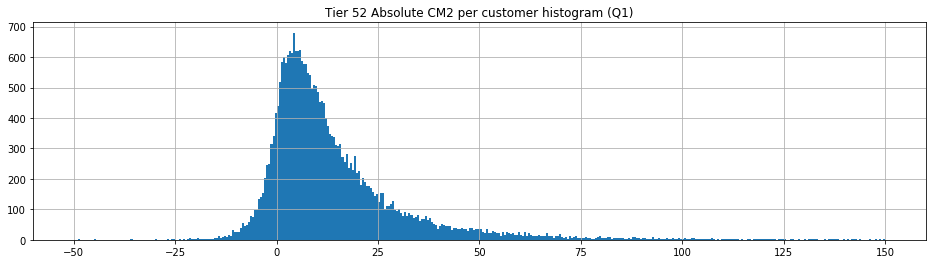

,CM2
count,27497.000000
mean,14.247634
std,19.247475
min,-159.940000
25%,3.420000
50%,9.280000
75%,19.100000
max,593.820000


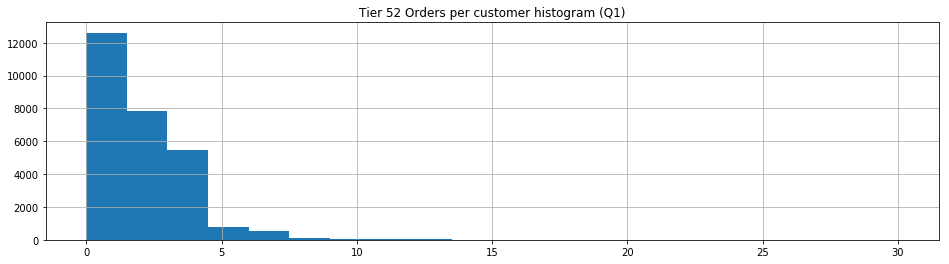

,ORDERS
count,27497.000000
mean,2.046951
std,1.533241
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,49.000000


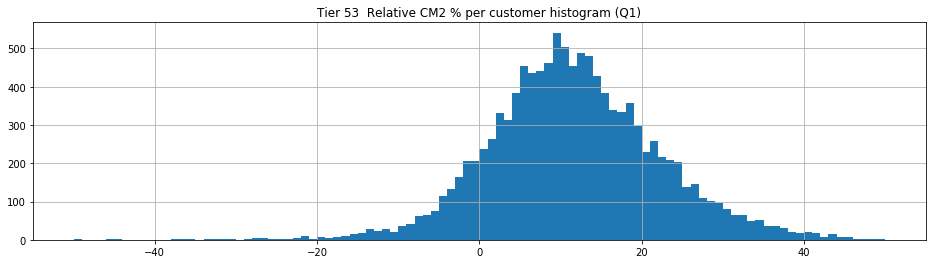

,CM2%
count,11493.000000
mean,11.663303
std,10.554148
min,-111.770000
25%,5.060000
50%,11.150000
75%,18.110000
max,56.520000


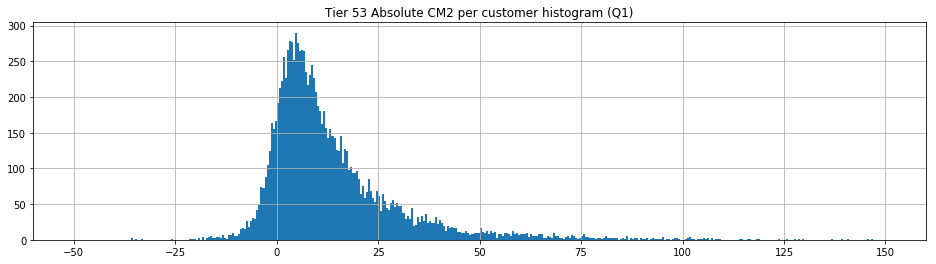

,CM2
count,11493.000000
mean,13.732239
std,18.210252
min,-35.890000
25%,3.320000
50%,8.920000
75%,18.460000
max,481.510000


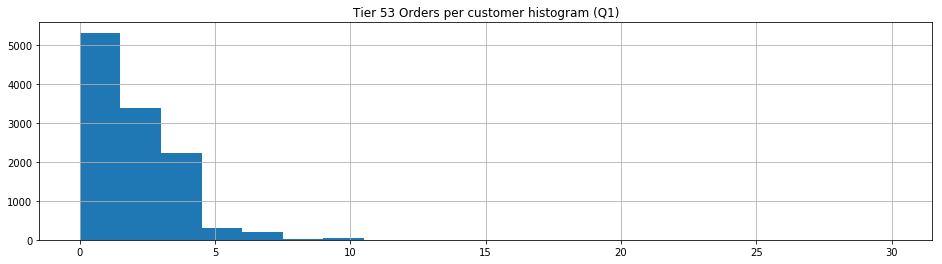

,ORDERS
count,11493.000000
mean,1.999739
std,1.460615
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,47.000000


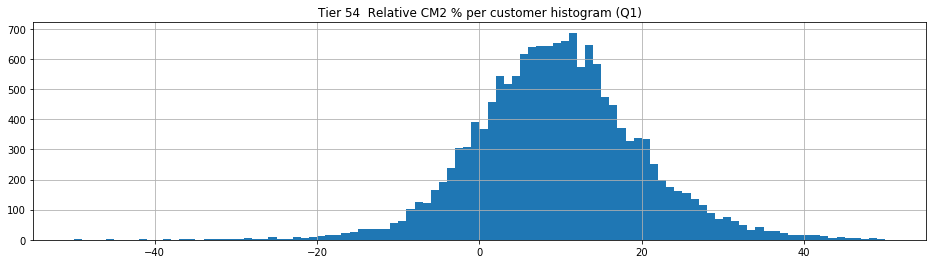

,CM2%
count,15259.000000
mean,9.572708
std,11.502665
min,-560.340000
25%,3.140000
50%,9.390000
75%,15.590000
max,69.780000


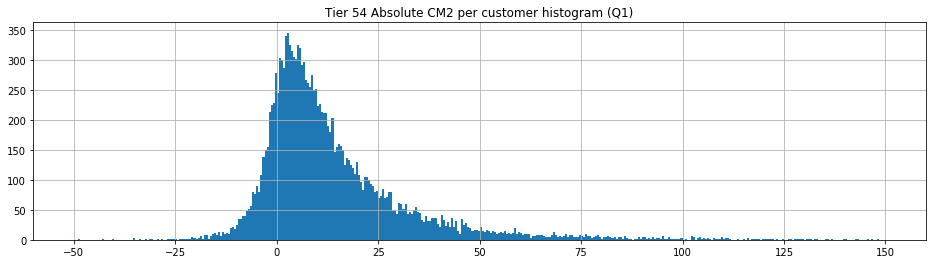

,CM2
count,15259.000000
mean,14.385565
std,23.151884
min,-99.290000
25%,2.460000
50%,8.810000
75%,19.670000
max,1024.590000


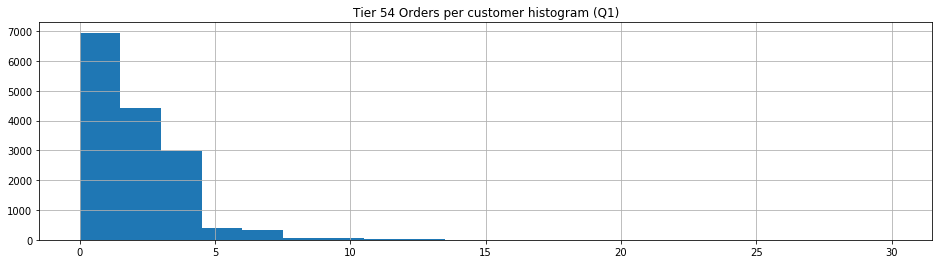

,ORDERS
count,15259.000000
mean,2.068353
std,1.552880
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,32.000000


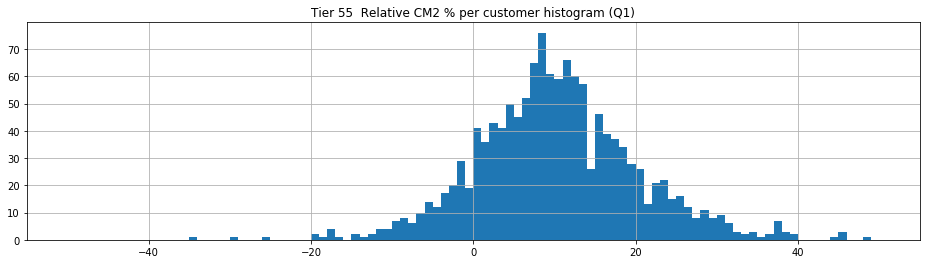

,CM2%
count,1324.000000
mean,10.190279
std,10.157164
min,-59.960000
25%,4.027500
50%,9.685000
75%,16.102500
max,48.630000


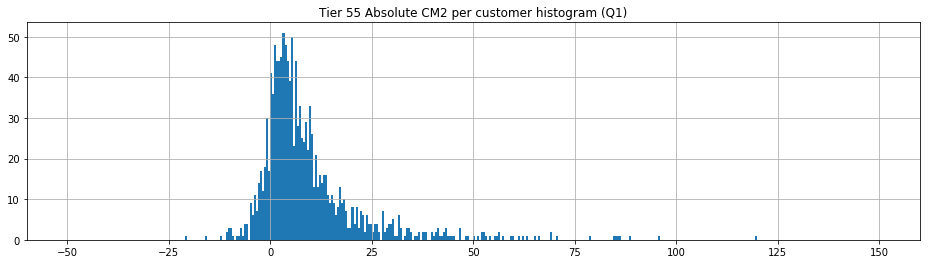

,CM2
count,1325.000000
mean,9.487275
std,14.223344
min,-20.540000
25%,1.930000
50%,5.650000
75%,12.080000
max,192.190000


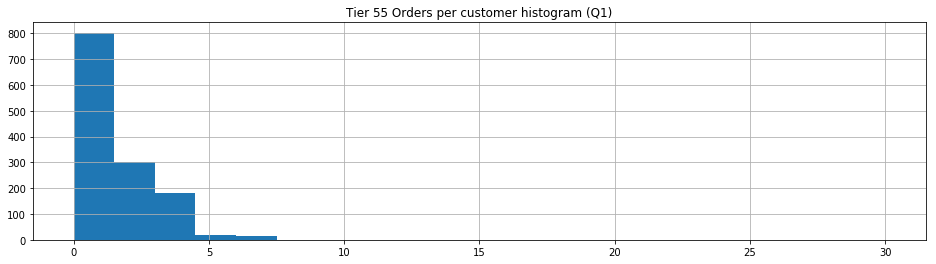

,ORDERS
count,1325.000000
mean,1.676981
std,1.087469
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,9.000000


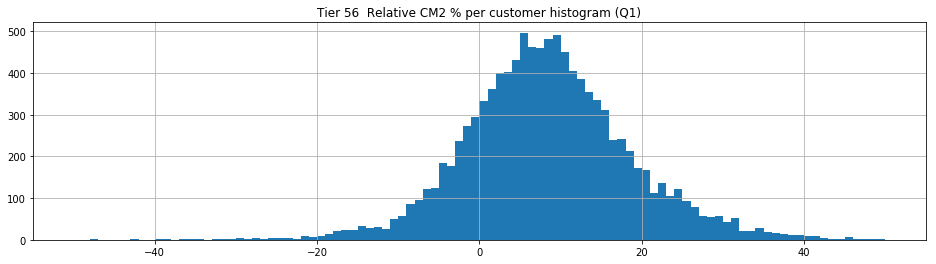

,CM2%
count,10684.000000
mean,8.357847
std,10.487247
min,-157.620000
25%,1.990000
50%,8.035000
75%,14.330000
max,73.540000


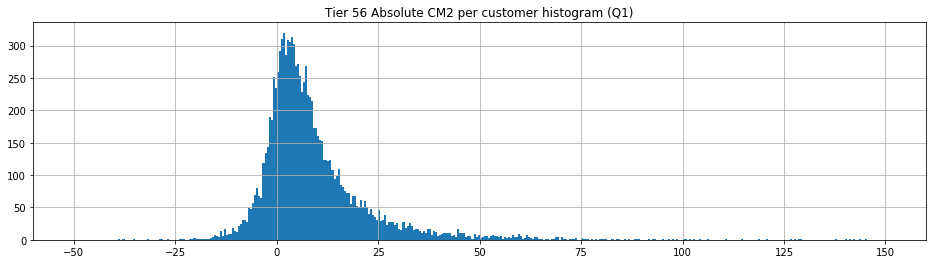

,CM2
count,10684.000000
mean,9.238490
std,16.282046
min,-38.960000
25%,1.220000
50%,5.730000
75%,12.800000
max,581.010000


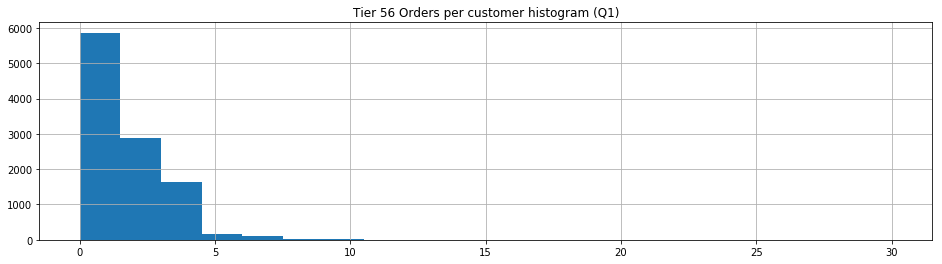

,ORDERS
count,10684.000000
mean,1.759547
std,1.189098
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,31.000000


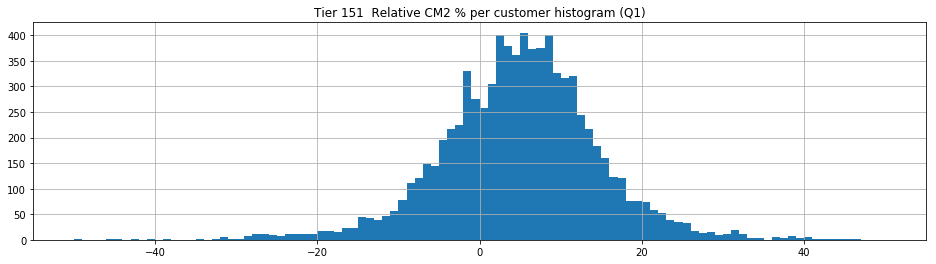

,CM2%
count,8134.000000
mean,4.892561
std,9.824047
min,-70.320000
25%,-0.907500
50%,5.190000
75%,10.740000
max,50.570000


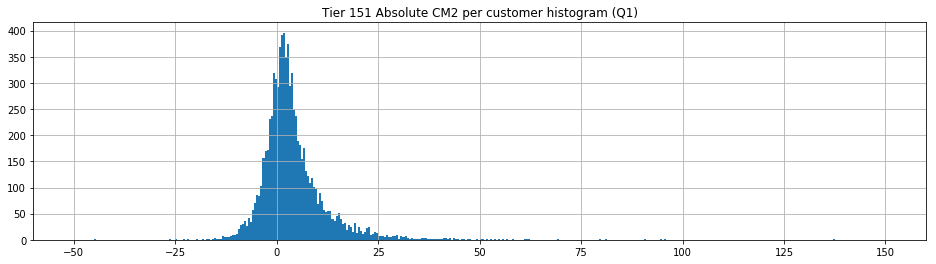

,CM2
count,8135.000000
mean,4.046841
std,8.397761
min,-44.980000
25%,-0.425000
50%,2.490000
75%,6.570000
max,182.690000


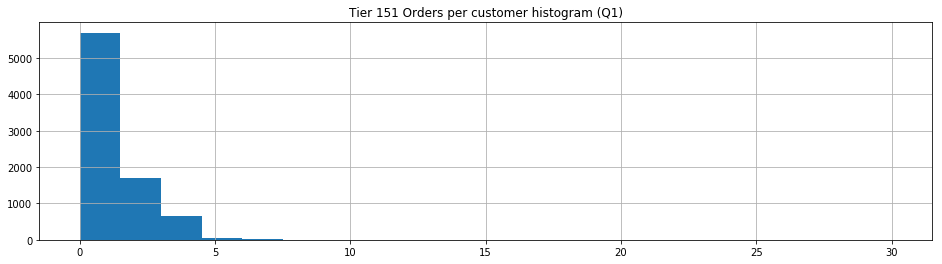

,ORDERS
count,8135.000000
mean,1.441795
std,0.842837
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,17.000000


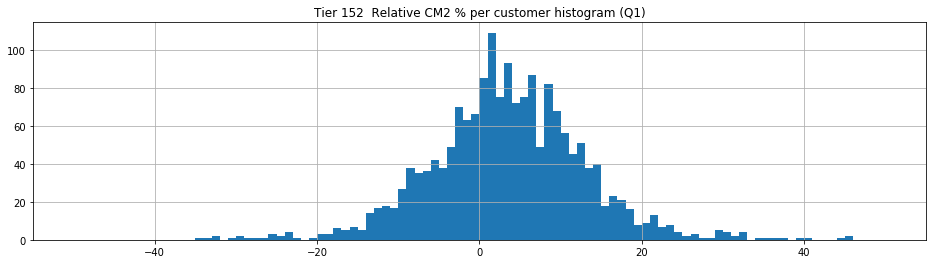

,CM2%
count,1764.000000
mean,3.520289
std,9.676498
min,-34.080000
25%,-2.122500
50%,3.310000
75%,9.125000
max,54.220000


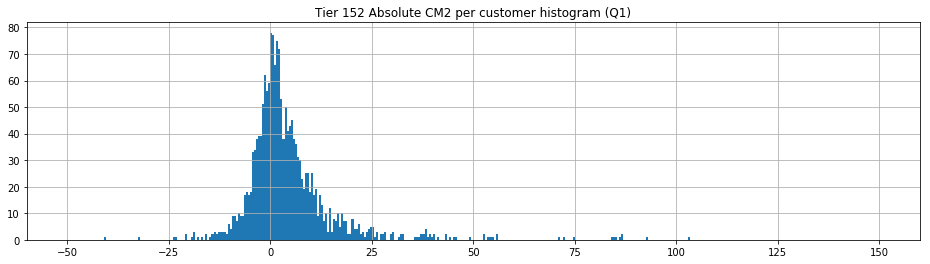

,CM2
count,1764.000000
mean,4.296054
std,11.255372
min,-40.760000
25%,-1.220000
50%,2.050000
75%,6.990000
max,103.220000


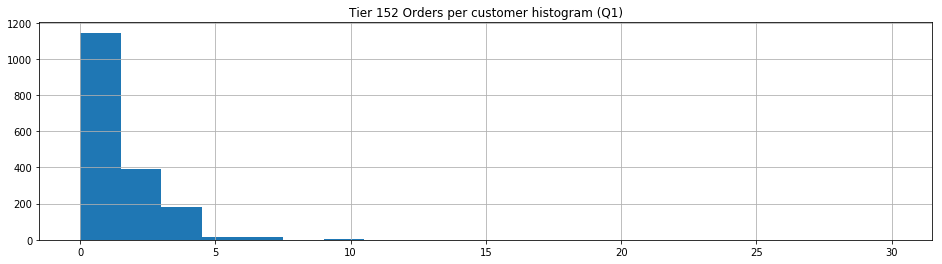

,ORDERS
count,1764.000000
mean,1.592404
std,1.174492
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,18.000000


In [14]:
for tq in tiers:
    data_tier = data[data['TIER'] == tq]
    
    plt.figure(figsize=(16,4))
    data_tier['CM2%'].hist(bins=100, range=(-50, 50))
    title = 'Tier ' + str(tq) + '  Relative CM2 % per customer histogram (Q1)'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['CM2%'].describe()))
        
    plt.figure(figsize=(16,4))
    data_tier['CM2'].hist(bins=400, range=(-50, 150))
    title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram (Q1)'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['CM2'].describe()))
    
    plt.figure(figsize=(16,4))
    data_tier['ORDERS'].hist(bins=20, range=(0, 30))
    title = 'Tier ' + str(tq) + ' Orders per customer histogram (Q1)'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['ORDERS'].describe()))

In [15]:
data_simulation = data.copy()

In [16]:
data_simulation['ORDERS'] = data_simulation['ORDERS'] * 3
data_simulation['CM2'] = data_simulation['CM2'] * 3

In [17]:
sim = data_simulation[['CUSTOMER_ID', 'TIER', 'ORDERS', 'CM2', 'CM2%']]

...........................................................TIER  51 ..........................................................


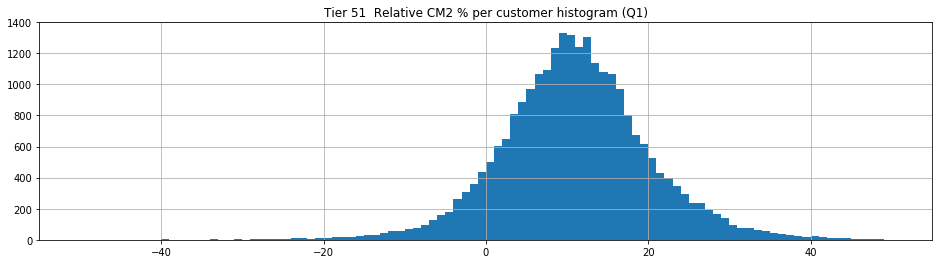

,CM2%
count,25413.000000
mean,10.963003
std,9.690659
min,-393.490000
25%,5.490000
50%,10.840000
75%,16.270000
max,62.250000


CM2% threshold >= 5  is the percentile 23.28
CM2% threshold >= 7  is the percentile 31.3
CM2% threshold >=  6.690000000000001  is the percentile 30 allowing us to stay with the 70% of our sample


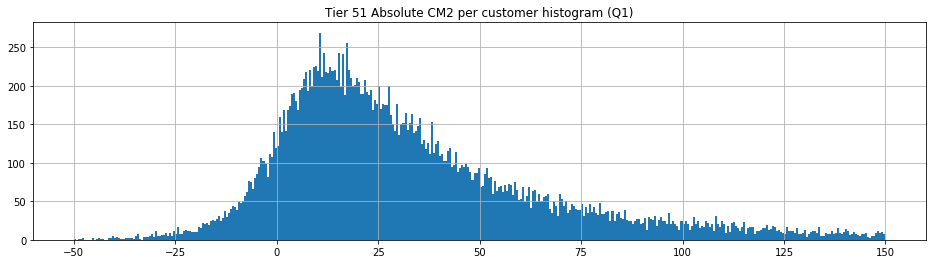

,CM2
count,25413.000000
mean,38.705481
std,52.329031
min,-159.150000
25%,10.470000
50%,25.620000
75%,50.940000
max,2498.760000


13.200000000000001  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  13.200000000000001  we keep eligible a  67.62  % from our customers
With CM2% threshold >= 7 and CM2 >=  13.200000000000001  we keep eligible a  62.98  % from our customers
With CM2% threshold >=  6.690000000000001  and CM2 >=  13.200000000000001  we keep eligible a  63.81  % from our customers


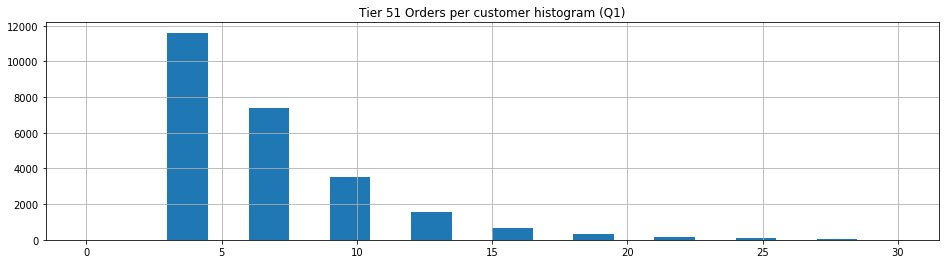

,ORDERS
count,25413.000000
mean,6.048755
std,4.126190
min,3.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,72.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  76.72  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  68.7  % from our customers
With CM2% threshold >=  6.690000000000001  and Orders >=  3.0  we keep eligible a  69.98  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  52 ..........................................................


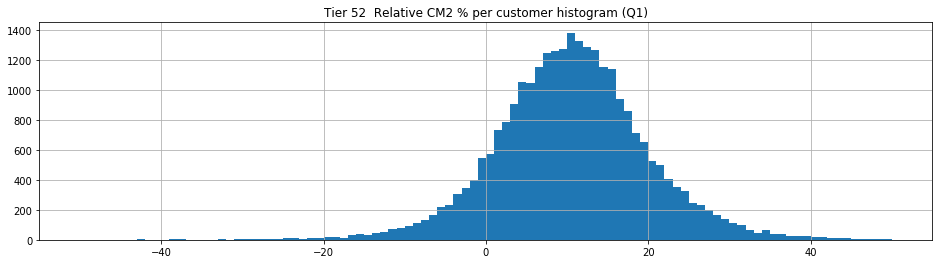

,CM2%
count,27497.000000
mean,10.504687
std,9.727922
min,-332.480000
25%,4.780000
50%,10.500000
75%,16.030000
max,60.970000


C:\Users\albertoma\AppData\Local\conda\conda\envs\py36\lib\site-packages\scipy\stats\stats.py:1796: RuntimeWarning: invalid value encountered in less
  return np.sum(a < score) / float(n) * 100


CM2% threshold >= 5  is the percentile 25.77
CM2% threshold >= 7  is the percentile 33.77
CM2% threshold >=  6.1  is the percentile 30 allowing us to stay with the 70% of our sample


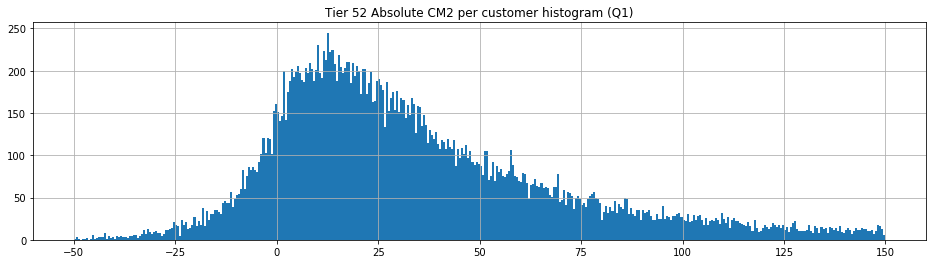

,CM2
count,27497.000000
mean,42.742901
std,57.742424
min,-479.820000
25%,10.260000
50%,27.840000
75%,57.300000
max,1781.460000


13.440000000000001  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  13.440000000000001  we keep eligible a  66.88  % from our customers
With CM2% threshold >= 7 and CM2 >=  13.440000000000001  we keep eligible a  61.75  % from our customers
With CM2% threshold >=  6.1  and CM2 >=  13.440000000000001  we keep eligible a  64.44  % from our customers


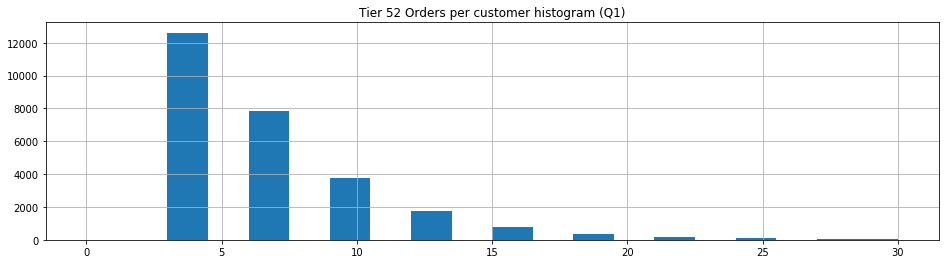

,ORDERS
count,27497.000000
mean,6.140852
std,4.599724
min,3.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,147.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  74.23  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  66.23  % from our customers
With CM2% threshold >=  6.1  and Orders >=  3.0  we keep eligible a  70.0  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  53 ..........................................................


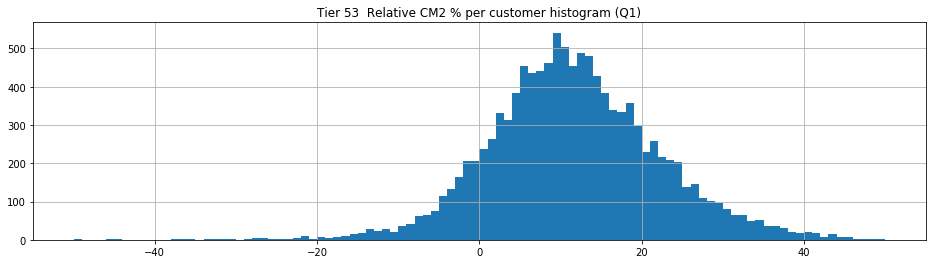

,CM2%
count,11493.000000
mean,11.663303
std,10.554148
min,-111.770000
25%,5.060000
50%,11.150000
75%,18.110000
max,56.520000


CM2% threshold >= 5  is the percentile 24.75
CM2% threshold >= 7  is the percentile 32.48
CM2% threshold >=  6.34  is the percentile 30 allowing us to stay with the 70% of our sample


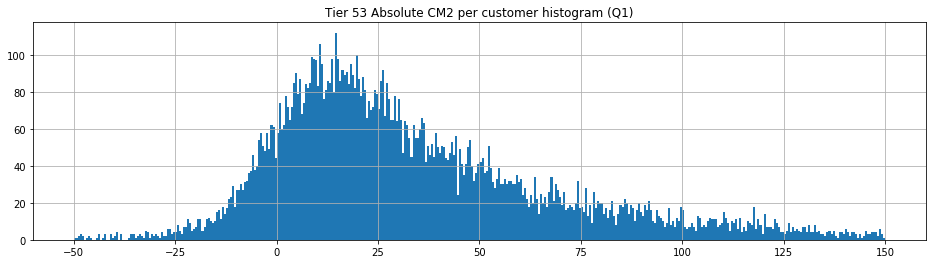

,CM2
count,11493.000000
mean,41.196716
std,54.630755
min,-107.670000
25%,9.960000
50%,26.760000
75%,55.380000
max,1444.530000


13.26  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  13.26  we keep eligible a  67.53  % from our customers
With CM2% threshold >= 7 and CM2 >=  13.26  we keep eligible a  62.72  % from our customers
With CM2% threshold >=  6.34  and CM2 >=  13.26  we keep eligible a  64.46  % from our customers


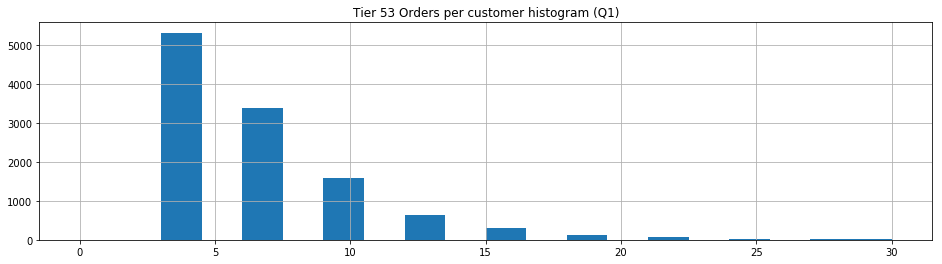

,ORDERS
count,11493.000000
mean,5.999217
std,4.381846
min,3.000000
25%,3.000000
50%,6.000000
75%,6.000000
max,141.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  75.25  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  67.52  % from our customers
With CM2% threshold >=  6.34  and Orders >=  3.0  we keep eligible a  70.05  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  54 ..........................................................


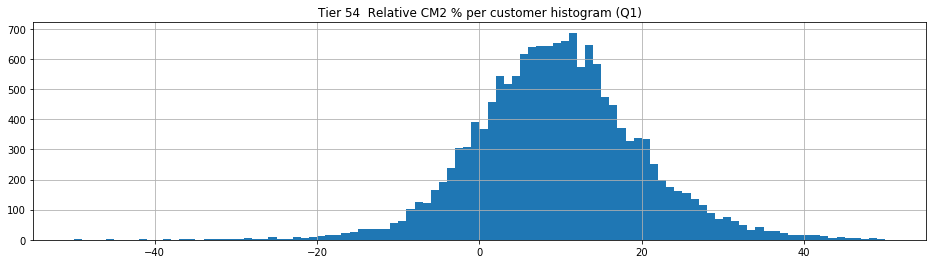

,CM2%
count,15259.000000
mean,9.572708
std,11.502665
min,-560.340000
25%,3.140000
50%,9.390000
75%,15.590000
max,69.780000


CM2% threshold >= 5  is the percentile 31.49
CM2% threshold >= 7  is the percentile 39.72
CM2% threshold >=  4.57  is the percentile 30 allowing us to stay with the 70% of our sample


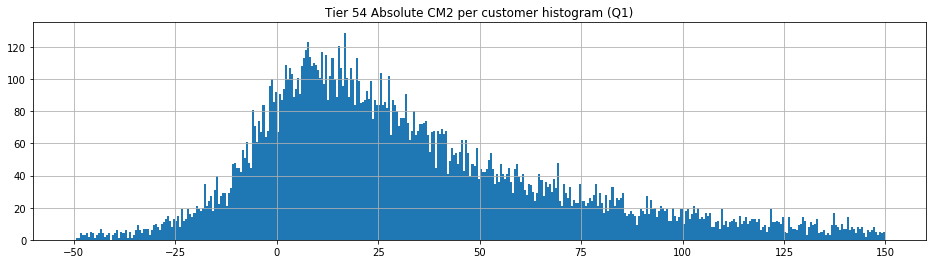

,CM2
count,15259.000000
mean,43.156696
std,69.455651
min,-297.870000
25%,7.380000
50%,26.430000
75%,59.010000
max,3073.770000


10.86  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  10.86  we keep eligible a  64.85  % from our customers
With CM2% threshold >= 7 and CM2 >=  10.86  we keep eligible a  58.33  % from our customers
With CM2% threshold >=  4.57  and CM2 >=  10.86  we keep eligible a  65.93  % from our customers


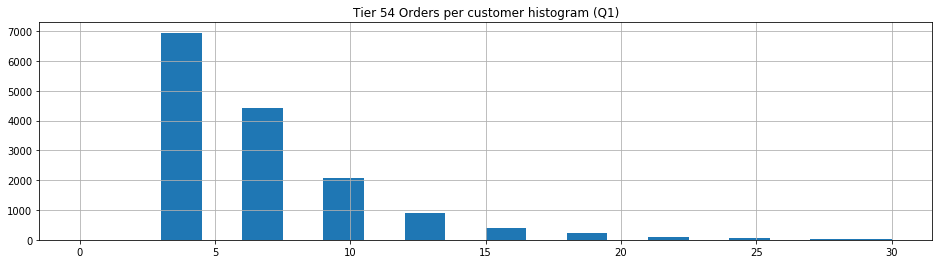

,ORDERS
count,15259.000000
mean,6.205059
std,4.658641
min,3.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,96.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  68.51  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  60.28  % from our customers
With CM2% threshold >=  4.57  and Orders >=  3.0  we keep eligible a  70.0  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  55 ..........................................................


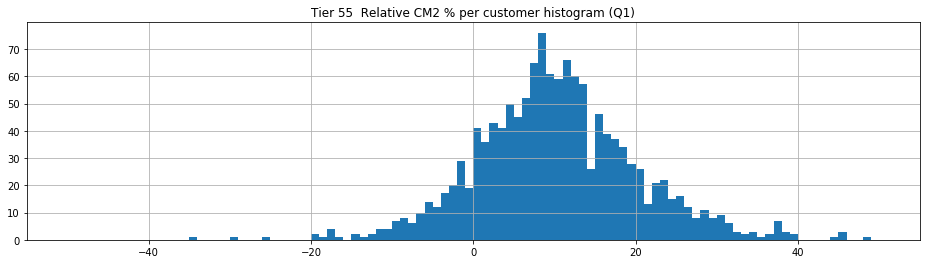

,CM2%
count,1325.000000
mean,10.182589
std,10.157186
min,-59.960000
25%,4.020000
50%,9.670000
75%,16.100000
max,48.630000


CM2% threshold >= 5  is the percentile 28.53
CM2% threshold >= 7  is the percentile 35.85
CM2% threshold >=  5.376  is the percentile 30 allowing us to stay with the 70% of our sample


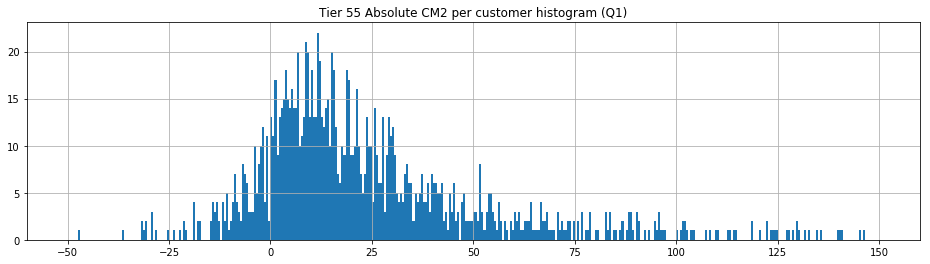

,CM2
count,1325.000000
mean,28.461826
std,42.670033
min,-61.620000
25%,5.790000
50%,16.950000
75%,36.240000
max,576.570000


8.370000000000001  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  8.370000000000001  we keep eligible a  66.34  % from our customers
With CM2% threshold >= 7 and CM2 >=  8.370000000000001  we keep eligible a  60.91  % from our customers
With CM2% threshold >=  5.376  and CM2 >=  8.370000000000001  we keep eligible a  65.36  % from our customers


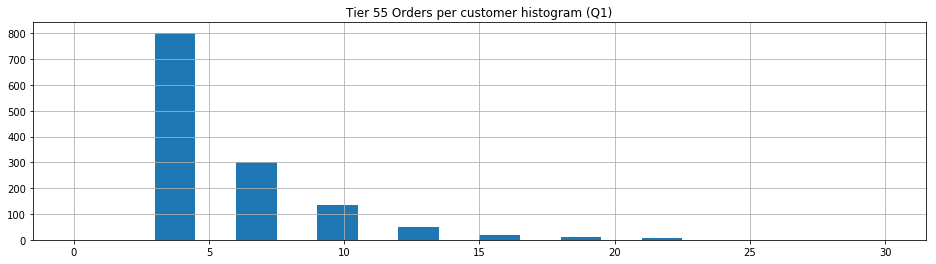

,ORDERS
count,1325.000000
mean,5.030943
std,3.262407
min,3.000000
25%,3.000000
50%,3.000000
75%,6.000000
max,27.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  71.4  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  64.08  % from our customers
With CM2% threshold >=  5.376  and Orders >=  3.0  we keep eligible a  69.96  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  56 ..........................................................


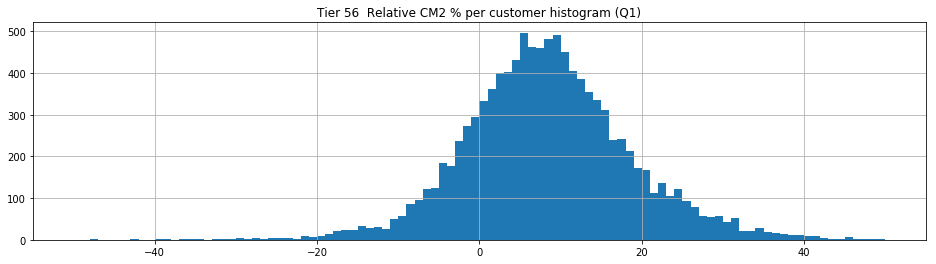

,CM2%
count,10684.000000
mean,8.357847
std,10.487247
min,-157.620000
25%,1.990000
50%,8.035000
75%,14.330000
max,73.540000


CM2% threshold >= 5  is the percentile 36.59
CM2% threshold >= 7  is the percentile 45.56
CM2% threshold >=  3.33  is the percentile 30 allowing us to stay with the 70% of our sample


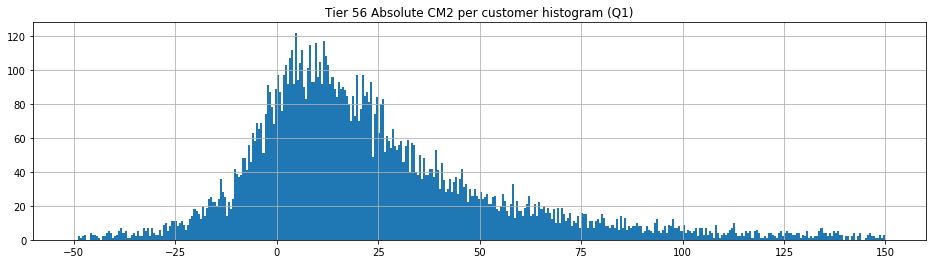

,CM2
count,10684.000000
mean,27.715471
std,48.846138
min,-116.880000
25%,3.660000
50%,17.190000
75%,38.400000
max,1743.030000


6.209999999999999  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  6.209999999999999  we keep eligible a  62.25  % from our customers
With CM2% threshold >= 7 and CM2 >=  6.209999999999999  we keep eligible a  54.17  % from our customers
With CM2% threshold >=  3.33  and CM2 >=  6.209999999999999  we keep eligible a  66.88  % from our customers


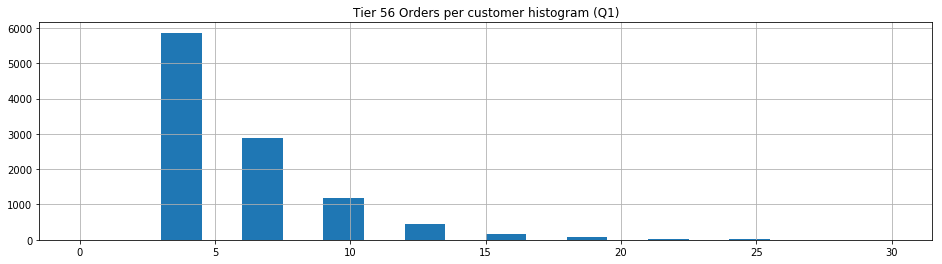

,ORDERS
count,10684.000000
mean,5.278641
std,3.567295
min,3.000000
25%,3.000000
50%,3.000000
75%,6.000000
max,93.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  63.41  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  54.44  % from our customers
With CM2% threshold >=  3.33  and Orders >=  3.0  we keep eligible a  70.02  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  151 ..........................................................


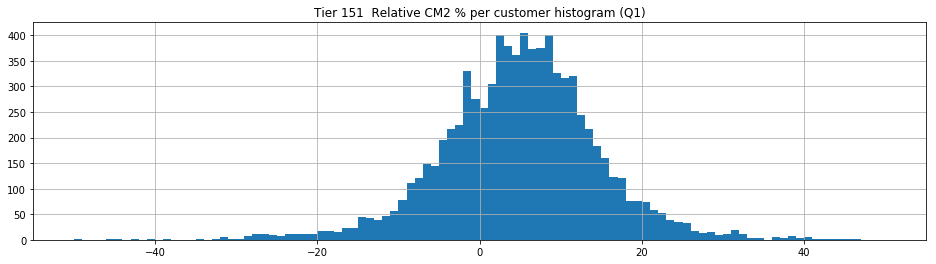

,CM2%
count,8135.000000
mean,4.891959
std,9.823593
min,-70.320000
25%,-0.905000
50%,5.190000
75%,10.740000
max,50.570000


CM2% threshold >= 5  is the percentile 49.04
CM2% threshold >= 7  is the percentile 58.6
CM2% threshold >=  0.5719999999999982  is the percentile 30 allowing us to stay with the 70% of our sample


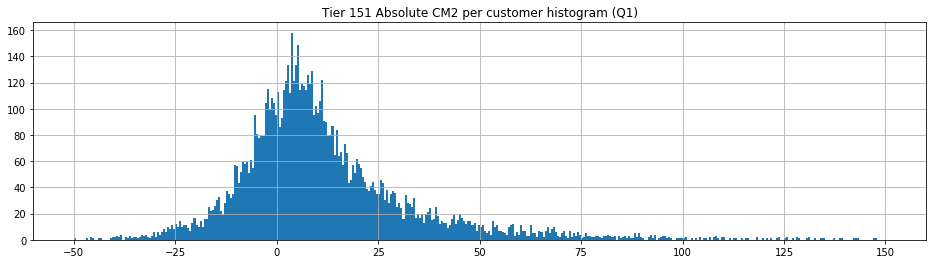

,CM2
count,8135.000000
mean,12.140522
std,25.193282
min,-134.940000
25%,-1.275000
50%,7.470000
75%,19.710000
max,548.070000


0.81  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  0.81  we keep eligible a  50.95  % from our customers
With CM2% threshold >= 7 and CM2 >=  0.81  we keep eligible a  41.39  % from our customers
With CM2% threshold >=  0.5719999999999982  and CM2 >=  0.81  we keep eligible a  69.69  % from our customers


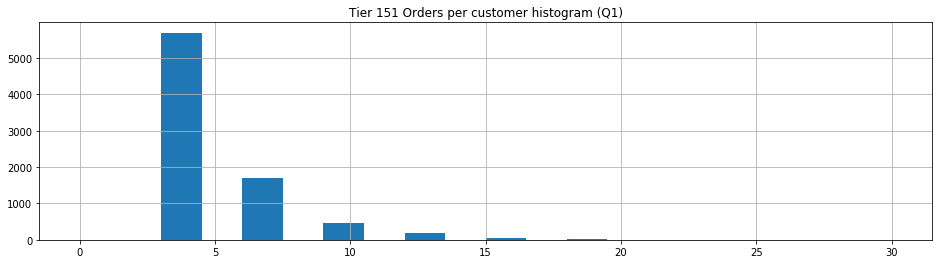

,ORDERS
count,8135.000000
mean,4.325384
std,2.528512
min,3.000000
25%,3.000000
50%,3.000000
75%,6.000000
max,51.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  50.95  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  41.39  % from our customers
With CM2% threshold >=  0.5719999999999982  and Orders >=  3.0  we keep eligible a  69.99  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  152 ..........................................................


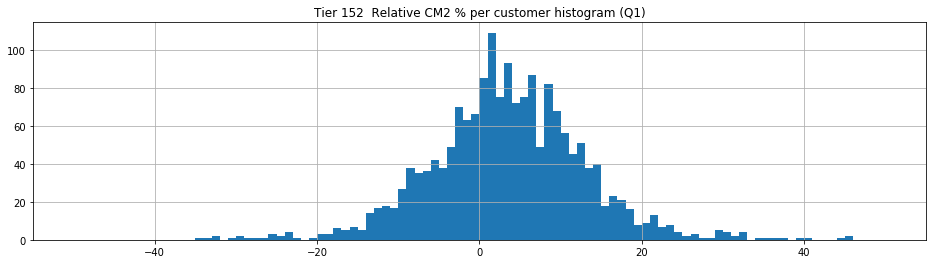

,CM2%
count,1764.000000
mean,3.520289
std,9.676498
min,-34.080000
25%,-2.122500
50%,3.310000
75%,9.125000
max,54.220000


CM2% threshold >= 5  is the percentile 57.48
CM2% threshold >= 7  is the percentile 66.67
CM2% threshold >=  -0.7610000000000002  is the percentile 30 allowing us to stay with the 70% of our sample


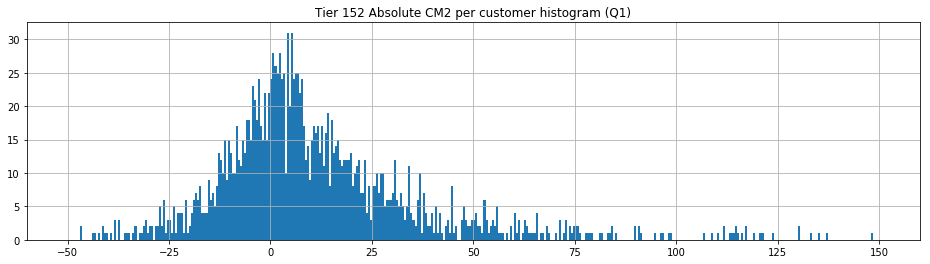

,CM2
count,1764.000000
mean,12.888163
std,33.766116
min,-122.280000
25%,-3.660000
50%,6.150000
75%,20.970000
max,309.660000


-1.32  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  -1.32  we keep eligible a  42.52  % from our customers
With CM2% threshold >= 7 and CM2 >=  -1.32  we keep eligible a  33.33  % from our customers
With CM2% threshold >=  -0.7610000000000002  and CM2 >=  -1.32  we keep eligible a  69.44  % from our customers


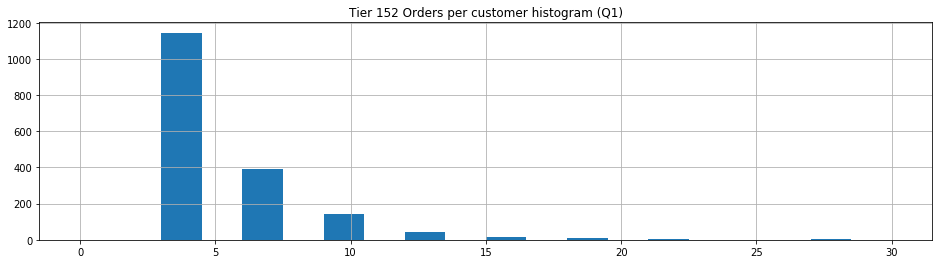

,ORDERS
count,1764.000000
mean,4.777211
std,3.523476
min,3.000000
25%,3.000000
50%,3.000000
75%,6.000000
max,54.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  42.52  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  33.33  % from our customers
With CM2% threshold >=  -0.7610000000000002  and Orders >=  3.0  we keep eligible a  70.01  % from our customers
                                                                                                                    
                                                                                                                    


In [18]:
for tq in tiers:
    data_tier = sim[sim['TIER'] == tq]
    print('...........................................................TIER ', tq, '..........................................................')
    # CM2% per customer
    plt.figure(figsize=(16,4))
    data_tier['CM2%'].hist(bins=100, range=(-50, 50))
    title = 'Tier ' + str(tq) + '  Relative CM2 % per customer histogram (Q1)'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['CM2%'].fillna(0).describe()))
    perc_30_cm2_rel = data_tier['CM2%'].fillna(0).quantile(.3)
    print('CM2% threshold >= 5  is the percentile', stats.percentileofscore(data_tier['CM2%'], 5, kind='strict').round(2))
    print('CM2% threshold >= 7  is the percentile', stats.percentileofscore(data_tier['CM2%'], 7, kind='strict').round(2))
    print('CM2% threshold >= ', perc_30_cm2_rel, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    # CM2 € per customer
    plt.figure(figsize=(16,4))
    data_tier['CM2'].hist(bins=400, range=(-50, 150))
    title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram (Q1)'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['CM2'].describe()))
    perc_30_cm2_abs = data_tier['CM2'].fillna(0).quantile(.3)
    val1 = float(data_tier[(data_tier['CM2%'] >= 5) & (data_tier['CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val2 = float(data_tier[(data_tier['CM2%'] >= 7) & (data_tier['CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val3 = float(data_tier[(data_tier['CM2%'] >= perc_30_cm2_rel) & (data_tier['CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    print(perc_30_cm2_abs, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    print('                                                                                                                    ')
    print('With CM2% threshold >= 5 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val1, 2), ' % from our customers')
    print('With CM2% threshold >= 7 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val2, 2), ' % from our customers')
    print('With CM2% threshold >= ', perc_30_cm2_rel, ' and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val3, 2), ' % from our customers')
    # Orders per customer
    plt.figure(figsize=(16,4))
    data_tier['ORDERS'].hist(bins=20, range=(0, 30))
    title = 'Tier ' + str(tq) + ' Orders per customer histogram (Q1)'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['ORDERS'].describe()))
    perc_30_orders = data_tier['ORDERS'].quantile(.3)
    val4 = float(data_tier[(data_tier['CM2%'] >= 5) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val5 = float(data_tier[(data_tier['CM2%'] >= 7) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val6 = float(data_tier[(data_tier['CM2%'] >= perc_30_cm2_rel) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    print(perc_30_orders, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    print('                                                                                                                    ')
    print('With CM2% threshold >= 5 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val4, 2), ' % from our customers')
    print('With CM2% threshold >= 7 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val5, 2), ' % from our customers')
    print('With CM2% threshold >= ', perc_30_cm2_rel, ' and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val6, 2), ' % from our customers')
    print('                                                                                                                    ')
    print('                                                                                                                    ')

In [19]:
(data['SALES'] / data['NET_SALES']).describe()

count    101567.000000
mean          1.204468
std           0.039097
min           0.027069
25%           1.209954
50%           1.209994
75%           1.210029
max           1.210863
dtype: float64